# Regression

In [10]:
import pandas as pd
import numpy as np


In [11]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
concrete_data.shape

(1030, 9)

In [14]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [16]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[0:8]] # all columns except Strength
target = concrete_data[concrete_data_columns[8:]] # Strength column

In [17]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
target.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [19]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [20]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

In [22]:
def regression_model():
  
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [23]:
model = regression_model()

In [24]:
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Train on 721 samples, validate on 309 samples
Epoch 1/100
721/721 - 1s - loss: 1700.1204 - val_loss: 1191.4931
Epoch 2/100
721/721 - 0s - loss: 1598.6280 - val_loss: 1095.1755
Epoch 3/100
721/721 - 0s - loss: 1432.9695 - val_loss: 937.1369
Epoch 4/100
721/721 - 0s - loss: 1164.6975 - val_loss: 718.1450
Epoch 5/100
721/721 - 0s - loss: 817.1965 - val_loss: 466.1213
Epoch 6/100
721/721 - 0s - loss: 484.3925 - val_loss: 272.8070
Epoch 7/100
721/721 - 0s - loss: 296.9340 - val_loss: 186.1410
Epoch 8/100
721/721 - 0s - loss: 240.1272 - val_loss: 170.7518
Epoch 9/100
721/721 - 0s - loss: 220.1574 - val_loss: 170.9762
Epoch 10/100
721/721 - 0s - loss: 207.2289 - val_loss: 168.6994
Epoch 11/100
721/721 - 0s - loss: 198.1341 - val_loss: 168.6273
Epoch 12/100
721/721 - 0s - loss: 191.0982 - val_loss: 165.1866
Epoch 13/100
721/721 - 0s - loss: 184.5401 - val_loss: 164.0028
Epoch 14/100
721/721 - 0s - loss: 180.1651 - val_loss: 156.5676
Epoch 15/100
721/721 - 0s - loss: 175.1714 - val_loss: 159.81

# Classification


In [2]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

In [6]:

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 133s 12us/step


In [7]:
X_train.shape

(60000, 28, 28)

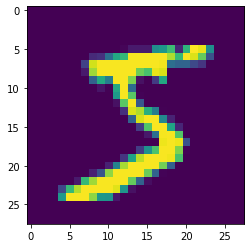

In [8]:
plt.imshow(X_train[0])

In [9]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [10]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10
